# Visualising time trends
The objectives of this exercise are as follows:

<ol>
 <li>	Plan - This is time trend data.  Make sure that you have the following variables:
     <ol>
         <li>Time variable is on the x-axis. </li>
         <li>A continuous numeric variable should be on the y-axis. </li>
         <li>Categorical variable(s) you want to show. </li>
     </ol>
 </li>
  <li> Tidy
     <ol>
         <li>Put the time (1A) into the format you need.  You can have two columns with the same values, in different formats, if you need.</li>
         <li>Eliminate any rows that don't have date data, ensuring that you've checked the original dataset and it is not a result of reformatting.</li>
         <li>Subset and rename (if required) columns from the dataset that you want to use.</li>
         <li>Provide readable values that you might need for any legend (e.g. maxtp in example in week 3).</li>
     </ol>
 </li> 
  <li>Reshape, beautify and plot
     <ol>
         <li>Plot a bar chart with the x-axis as the time / date (1A) and the y-axis as the continuous variable (1B).  Enhance it, saving  the theme, labels and x- and y- axis scaling as variables that can be added to the plot.</li>
         <li>Plot a stacked bar chart, using the information in 3A, and introducing the categorical variable (1C).  Enhance it by adding the saved theme, labels and scaling variables.</li>
         <li>Plot a scatter plot with the data from 3A (you may change formats, but the same data should be used).  Enhance it by adding the saved theme, labels and scaling variables, if appropriate.</li>
         <li>Add the categorical variable to your scatter plot (i.e. same info as 3B). </li>
         <li>Using a single value of the categorical variable (1C), plot a line chart.</li>
         <li>Using all values of the categorical variable (1C), plot a stacked line chart.</li>
         <li>Plot small multiples, using 1A on the x-axis and 1B on the y-axis.  You may choose your row and column values and the type of chart you want to generate.</li>
      </ol>
   </li>
   <li>Evaluate the charts you have plotted, saying which is more effective, and why you think so. </li>

</ol>

## Step by step

### Load the libraries
 - tidyverse provides ggplot and some of the tidying libraries.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load the Video Games Sales dataset

This is available as vgsales.csv on Brightspace, but was sourced from https://www.kaggle.com/datasets/gregorut/videogamesales

In [2]:
mydata = file.path("C:","Users","markc","Desktop","DataVisuals","datasets")

datapath <-file.path(mydata,'vgsales.csv')
df<-read.csv(datapath)
head(df)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


### 1. Plan
This is time trend data.  Make sure that you have the following variables:
     <ol>
         <li> 1A  Time variable is on the x-axis. </li>
         <li> 1B  A continuous numeric variable should be on the y-axis. </li>
         <li> 1C  Categorical variable(s) you want to show. </li>
     </ol>
 </li>
 

In [3]:
#Check to see if Global_Sales is a sum of the other sales using 'all.equal'.
# Assuming your data frame is named 'sales_data'

# Calculate the total sales from individual regions
total_sales_calculated <- rowSums(df[, c("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales")], na.rm = TRUE)

# Compare calculated total sales with the 'Total_Sales' column
all_equal <- all(total_sales_calculated == df$Global_Sales)

if (all_equal) {
  print("Total sales column matches the sum of regional sales.")
} else {
  print("Total sales column does not match the sum of regional sales.")
}

# Calculate the total sales from individual regions
total_sales_calculated <- rowSums(df[, c("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales")], na.rm = TRUE)

# Find rows where total sales don't match the calculated total
incorrect_rows <- which(total_sales_calculated != df$Total_Sales)

# Correct the total sales for the incorrect rows
df$Total_Sales[incorrect_rows] <- total_sales_calculated[incorrect_rows]

print("Total sales column corrected.")

# Check for missing values in the 'year' column
if (any(is.na(df$year))) {
  cat("Warning: There are missing values in the 'year' column.\n")
}



print(df$Year)





[1] "Total sales column does not match the sum of regional sales."
[1] "Total sales column corrected."
    [1] "2006" "1985" "2008" "2009" "1996" "1989" "2006" "2006" "2009" "1984"
   [11] "2005" "2005" "1999" "2007" "2009" "2010" "2013" "2004" "1990" "2005"
   [21] "2006" "1989" "1988" "2013" "2002" "2002" "2010" "2005" "2001" "2011"
   [31] "1998" "2010" "2013" "2015" "2012" "2012" "2009" "2011" "2001" "2008"
   [41] "2010" "2005" "2011" "2007" "2014" "2009" "1996" "2004" "2007" "2014"
   [51] "1992" "2008" "1997" "2011" "2010" "2009" "2008" "1993" "2004" "2004"
   [61] "2011" "2013" "2010" "1996" "2012" "2012" "1997" "2013" "2010" "1999"
   [71] "2007" "1994" "2013" "2012" "2007" "2011" "1992" "2015" "2010" "2004"
   [81] "2007" "2012" "2012" "2009" "1997" "2007" "2001" "1999" "2008" "1982"
   [91] "2005" "2010" "2015" "2014" "1998" "1997" "1988" "2014" "2008" "2011"
  [101] "2006" "2015" "2009" "2011" "2003" "1998" "1998" "2001" "2014" "2015"
  [111] "2003" "2012" "2013" "2004" "20

In [4]:
# Save the value of the year to a variable called 1a
a1 <- df$Year

# Save the global sales to a variable called 1b
b1 <- df$Global_Sales

# Save the genre to a variable called 1c
c1 <- df$Genre


1A is the year.  1B is the Global_Sales.  Other categorical variables can be the Sales area / Publisher / Genre / Platform.  In this example, I will user Genre.

### 2. Tidy
     
     
<ol>
         <li>Put the time (1A) into the format you need.  You can have two columns with the same values, in different formats, if you need.</li>
         <li>Eliminate any rows that don't have date data, ensuring that you've checked the original dataset and it is not a result of reformatting.</li>
         <li>Subset and rename (if required) columns from the dataset that you want to use.</li>
         <li>Provide readable values that you might need for any legend (e.g. maxtp in example in week 3).</li>
 </ol>


In [5]:
# Remove rows with null values in the "Year" column
df <- df[complete.cases(df$Year), ]

# Check the dimensions of the dataframe after removing null values
print(dim(df))



[1] 16598    11


In [6]:
options(repr.plot.height=6)

In [7]:
# Subset the dataframe to include only rows with non-null values in the "Year" column

df_ok <- df[complete.cases(df$Year), ]

# Check the dimensions of the subsetted dataframe
print(dim(df_ok))

[1] 16598    11


### 3. Reshape, beautify and plot

Remember that you have subsetted your data.  Do you need to aggregate before you plot?

In [8]:
# Aggregate by Genre and calculate the sum of Global_Sales for each Genre
aggregated_data <- aggregate(Global_Sales ~ Genre, data = df_ok, FUN = sum)

# Sort the aggregated data by Global_Sales in descending order
sorted_data <- aggregated_data[order(aggregated_data$Global_Sales, decreasing = TRUE), ]

# Select the top 5 genres
top_5_genres <- head(sorted_data, 5)

# Print the top 5 genres
print(top_5_genres)


          Genre Global_Sales
1        Action      1751.18
11       Sports      1330.93
9       Shooter      1037.37
8  Role-Playing       927.37
5      Platform       831.37


In [9]:
aes = theme_classic() + 
labs(title="Gloabal Video Game Sales of each genre by year ",
    subtitle="What is the seasonal trend?",
    x="Year",
    y="Global Sales",
    color="Genre") +
theme_bw() +
theme(
    axis.title=element_text())

In [10]:
options(repr.plot.width=10, repr.plot.height=8)  # Adjust the size of the plot within the Jupyter notebook


##### 3A  Plot a bar chart with the x-axis as the time / date (1A) and the y-axis as the continuous variable (1B).  Enhance it, saving  the theme, labels and x- and y- axis scaling as variables that can be added to the plot.

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message:
"Removed 271 rows containing missing values (`position_stack()`)."
Warning message:
"Removed 10 rows containing missing values (`geom_bar()`)."


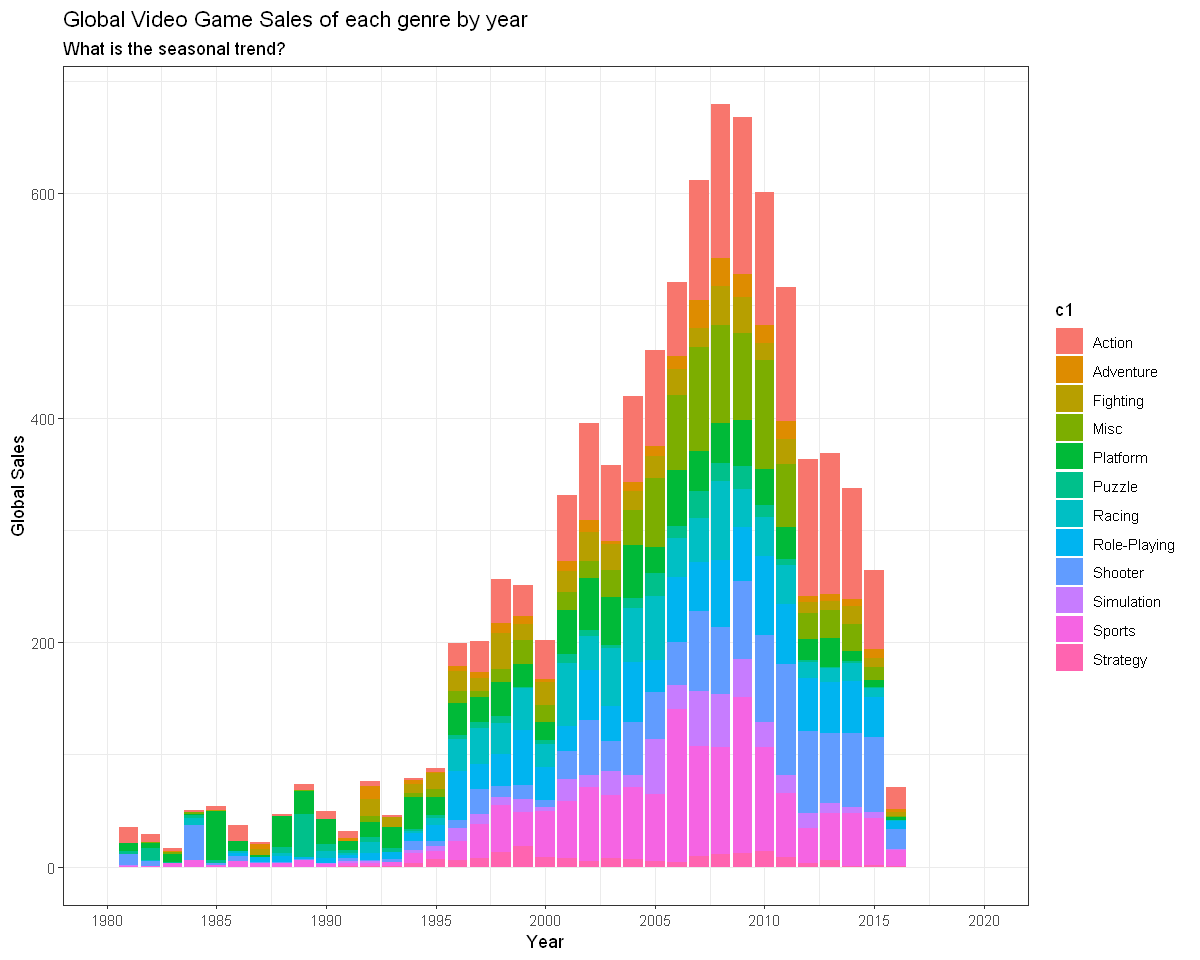

In [11]:
library(ggplot2)

# Convert "Year" to integer
df_ok$a1 <- as.integer(df_ok$Year)

# Create the plot
plot <- ggplot(df_ok, aes(x = a1, y = b1, fill = c1)) +
  geom_bar(stat = "identity") +
  labs(title = "Global Video Game Sales of each genre by year",
       subtitle = "What is the seasonal trend?",
       x = "Year",
       y = "Global Sales",
       color = "Genre") +
  theme_classic() +
  theme_bw() +
  
  scale_x_continuous(breaks = seq(1980, 2020, by = 5), limits = c(1980, 2020)) + # Set breaks and limits for x-axis

  theme(axis.title = element_text()) 
  

# Print the plot
print(plot)


##### 3B Plot a stacked bar chart, using the information in 3A, and introducing the categorical variable (1C).  Enhance it by adding the saved theme, labels and scaling variables. 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message:
"Removed 271 rows containing missing values (`position_stack()`)."
Warning message:
"Removed 271 rows containing missing values (`position_stack()`)."
Warning message:
"Removed 10 rows containing missing values (`geom_bar()`)."


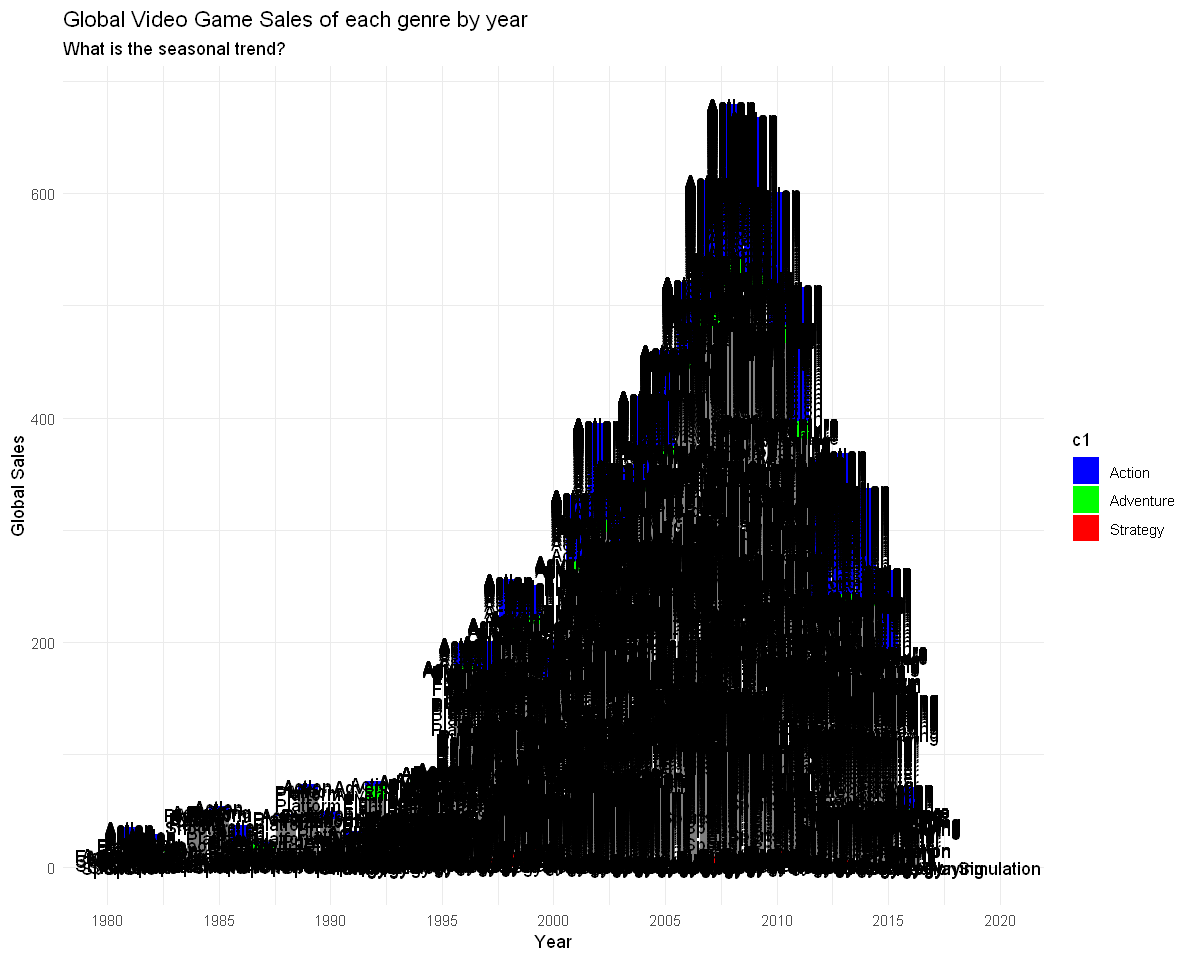

In [12]:
library(ggplot2)

# Convert "Year" to integer
df_ok$a1 <- as.integer(df_ok$Year)

# Create the plot
plot <- ggplot(df_ok, aes(x = a1, y = b1, fill = c1, label = c1)) +
  geom_bar(stat = "identity") +
  labs(title = "Global Video Game Sales of each genre by year",
       subtitle = "What is the seasonal trend?",
       x = "Year",
       y = "Global Sales",
       color = "Genre") +
  theme_minimal() +  # Change to your preferred saved theme
  scale_fill_manual(values = c("Action" = "blue", "Adventure" = "green", "Strategy" = "red")) +  # Adjust colors as needed
  theme(axis.title = element_text()) +
  geom_text(position = position_stack(vjust = 0.5)) +  # Add labels
  scale_x_continuous(breaks = seq(1980, 2020, by = 5), limits = c(1980, 2020))  # Set breaks and limits for x-axis

# Print the plot
print(plot)


##### 3C  Plot a scatter plot with the data from 3A (you may change formats, but the same data should be used).  Enhance it by adding the saved theme, labels and scaling variables, if appropriate. 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message:
"Removed 271 rows containing missing values (`geom_point()`)."


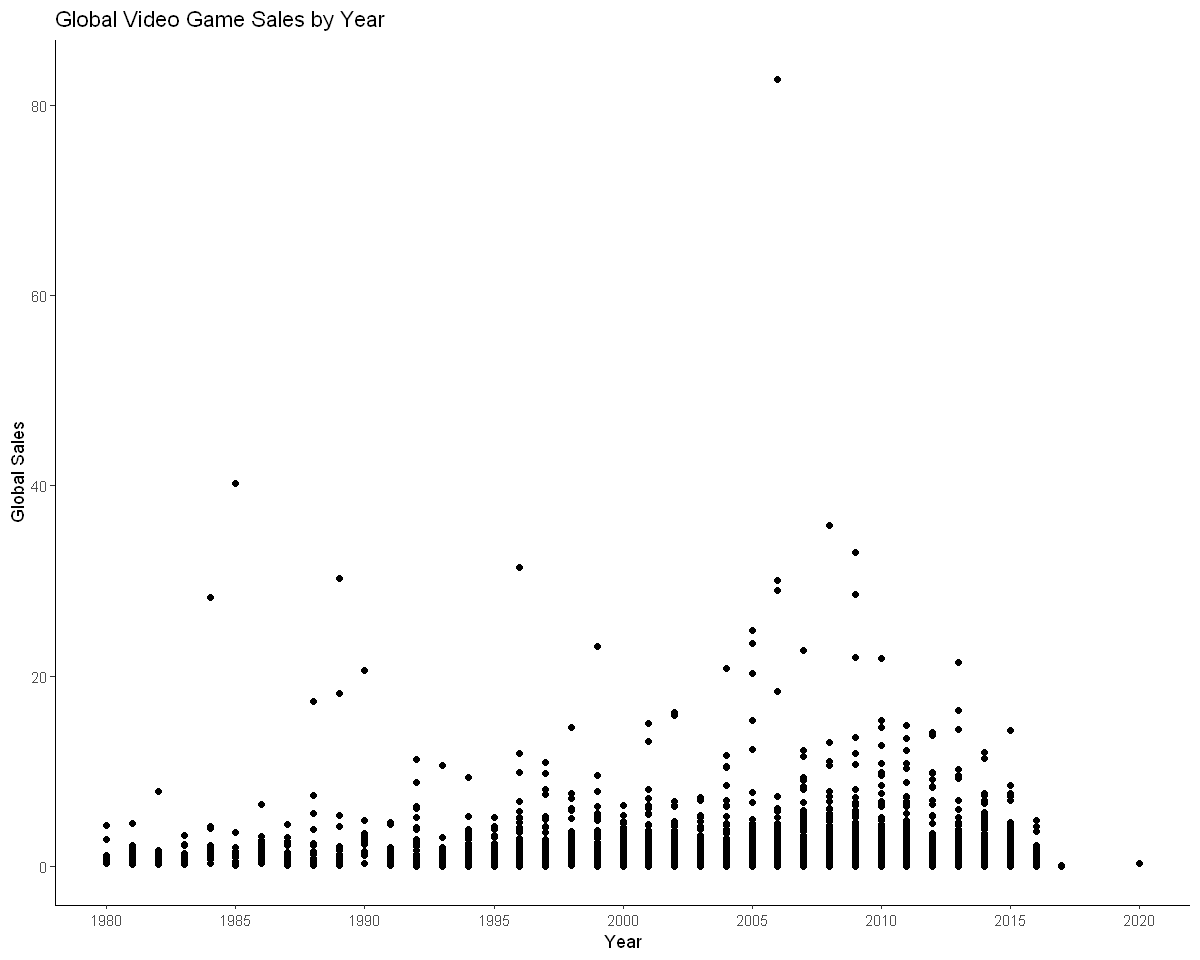

In [13]:
library(ggplot2)

# Convert "Year" to integer
df_ok$a1 <- as.integer(df_ok$Year)

# Create the scatter plot
scatter_plot <- ggplot(df_ok, aes(x = a1, y = b1)) +
  geom_point() +
  labs(title = "Global Video Game Sales by Year",
       x = "Year",
       y = "Global Sales") +
  theme_classic() +  # Change to your preferred saved theme
  scale_x_continuous(breaks = seq(1980, 2020, by = 5), limits = c(1980, 2020)) +  # Set breaks and limits for x-axis
  theme(axis.title = element_text()) 

# Print the scatter plot
print(scatter_plot)


##### 3D Add the categorical variable to your scatter plot (i.e. same info as 3B). 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message:
"Removed 271 rows containing missing values (`geom_point()`)."


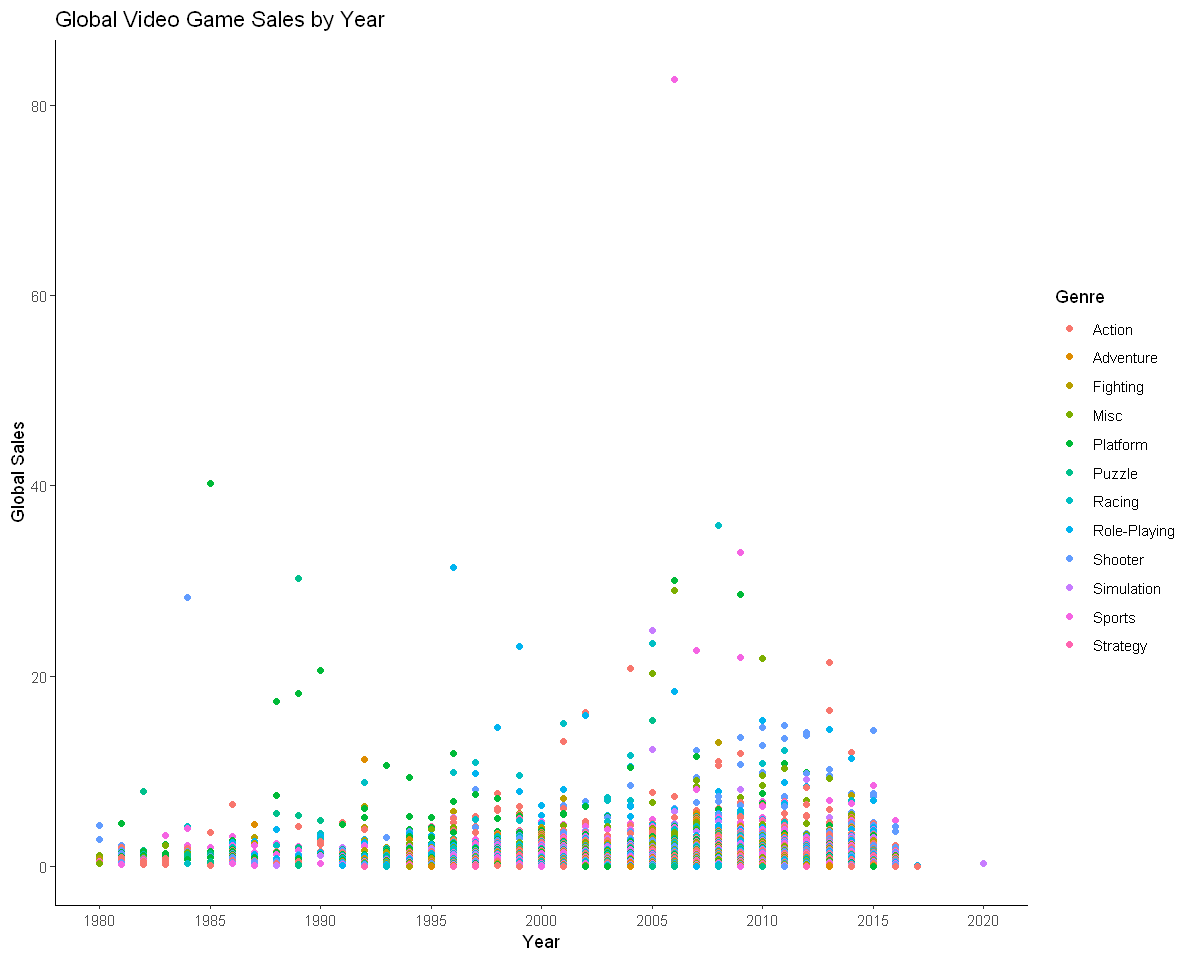

In [14]:
library(ggplot2)

# Convert "Year" to integer
df_ok$a1 <- as.integer(df_ok$Year)

# Create the scatter plot
scatter_plot <- ggplot(df_ok, aes(x = a1, y = b1, color = c1)) +
  geom_point() +
  labs(title = "Global Video Game Sales by Year",
       x = "Year",
       y = "Global Sales",
       color = "Genre") +
  theme_classic() +  # Change to your preferred saved theme
  scale_x_continuous(breaks = seq(1980, 2020, by = 5), limits = c(1980, 2020)) +  # Set breaks and limits for x-axis
  theme(axis.title = element_text()) 

# Print the scatter plot
print(scatter_plot)


##### 3E Using a single value of the categorical variable (1C), plot a line chart.

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message:
"Removed 271 rows containing missing values (`geom_line()`)."


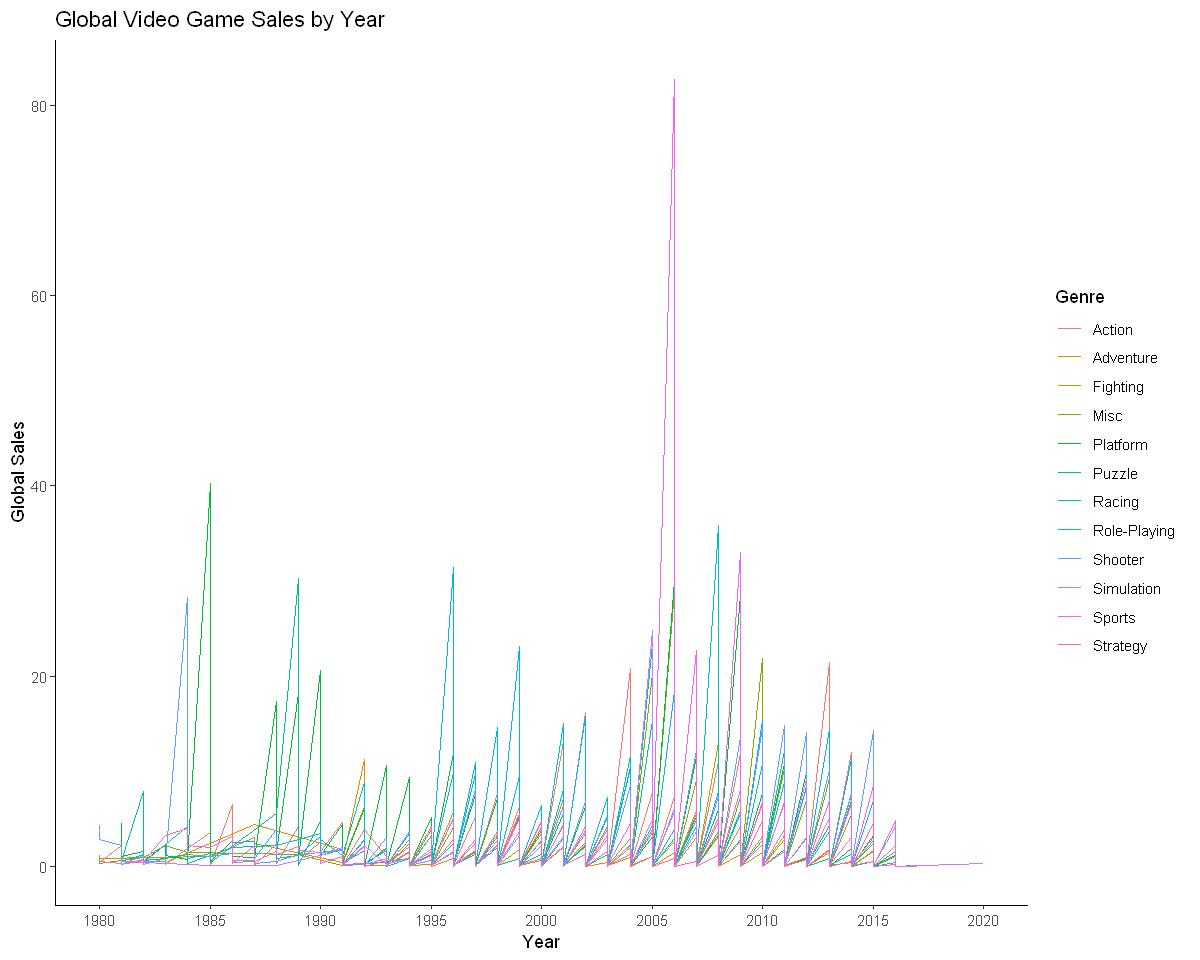

In [15]:
# Load necessary library
library(ggplot2)

# Convert "Year" to integer
df_ok$a1 <- as.integer(df_ok$Year)

# Create the line plot
line_plot <- ggplot(df_ok, aes(x = a1, y = b1, color = c1)) +
  geom_line() +
  labs(title = "Global Video Game Sales by Year",
       x = "Year",
       y = "Global Sales",
       color = "Genre") +
  theme_classic() +  # Change to your preferred saved theme
  scale_x_continuous(breaks = seq(1980, 2020, by = 5), limits = c(1980, 2020)) +  # Set breaks and limits for x-axis
  theme(axis.title = element_text()) 

# Print the line plot
print(line_plot)


##### 3F Using all values of the categorical variable (1C), plot a stacked line chart.

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message:
"Removed 271 rows containing missing values (`geom_line()`)."


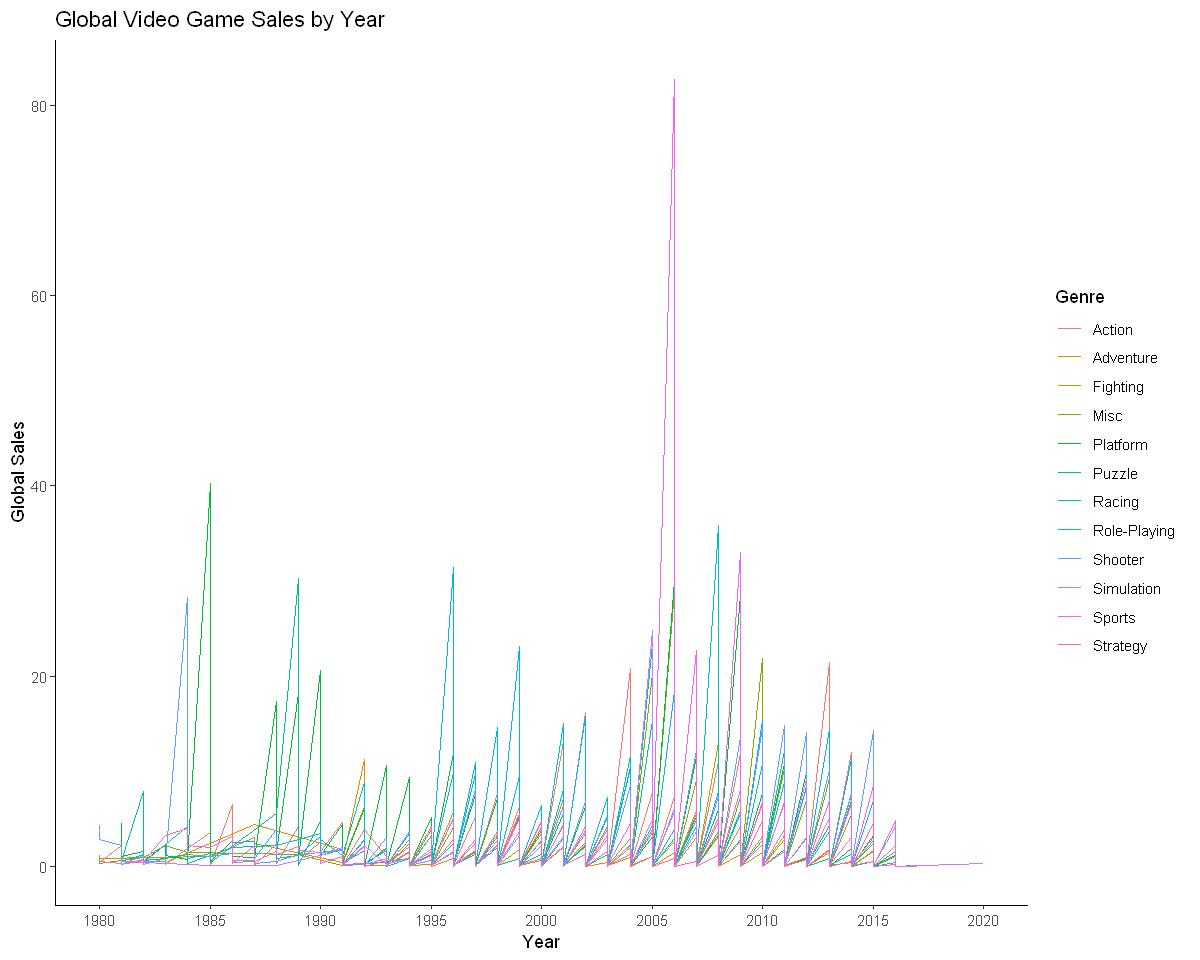

In [16]:
# Load necessary library
library(ggplot2)

# Convert "Year" to integer
df$a1 <- as.integer(df$Year)

# Create the line plot
line_plot <- ggplot(df, aes(x = a1, y = b1, color = c1)) +
  geom_line() +
  labs(title = "Global Video Game Sales by Year",
       x = "Year",
       y = "Global Sales",
       color = "Genre") +
  theme_classic() +  # Change to your preferred saved theme
  scale_x_continuous(breaks = seq(1980, 2020, by = 5), limits = c(1980, 2020)) +  # Set breaks and limits for x-axis
  theme(axis.title = element_text()) 

# Print the line plot
print(line_plot)


##### 3G Plot small multiples, using 1A on the x-axis and 1B on the y-axis.  You may choose your row and column values and the type of chart you want to generate.

### 4. Evaluate

Evaluate the charts you have plotted, using markdown or comments, saying which is more effective, and why you think so. 

The main takeaway is the bar chart is the best representation that I created for this lab